## DATATHON ##

Modelo de Machine Learning para un servicio de logística.

Por Ariel Serafini.

Versión 1.0

##### INTRODUCCIÓN #####

Se busca implementar un modelo que nos permita predecir si un envío llegará a tiempo o no, según la información contenida en el dataset puesto a disposición para poder prestar atención y mejor seguimiento a aquellos envíos que puedan llegar a dar problemas.

##### DESARROLLO #####

Luego de exportar los archivos de Excel al formato .csv, se importa acá el archivo E-commerce_train.xls con el cual se entrenará y testeará nuestro modelo.

In [2]:
# Se importan las librerías a utilizar:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use ('dark_background')

In [3]:
# Se importan los datos

df_train = pd.read_csv('E-Commerce_train.csv', sep=';')
df_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [4]:
# Se evalúa si hay algún dato faltante.

df_train.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
# Se evalúa el porcentaje de envíos entregados a tiempo

On_time_ratio= (df_train['Reached.on.Time_Y.N'].sum())*100 / len(df_train.index)




El 63.55% de los envíos llegan a tiempo. En este primer intento, no se considera que el dataset necesite ser equilibrado.

Dado que los algoritmos de Machine Learning utilizados trabajan únicamente con números, se reemplazan los siguientes strings con valores:

 Mode_of_Shipment: 

       Road = 0        Ship = 1        Flight = 2

 Product_importance:

       low = 0         medium = 1      high = 2  
    
 Gender:
 
       M = 0            F = 1

In [6]:
df_train = df_train.replace({"Road":0, "Ship":1, "Flight":2, "low":0, "medium":1, "high":2, "M":0 , "F":1})
df_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,2,4,2,177,3,0,1,44,1233,1
1,2,1,2,4,5,216,2,0,0,59,3088,1
2,3,A,2,2,2,183,4,0,0,48,3374,1
3,4,B,2,3,3,176,4,1,0,10,1177,1
4,5,C,2,2,2,184,3,1,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,1,3,1,217,3,0,1,1,4177,1
8995,8996,1,1,5,3,232,3,1,0,3,4526,0
8996,8997,A,1,4,5,260,3,1,1,6,4221,0
8997,8998,B,1,4,2,184,3,1,1,5,5931,1


Una vez importado y preprocesados los datos, se continúa con la evaluación de los atributos. Es de interés poder identificar qué atributos son los que mejor separan los paquetes que llegaron a tiempo con los que no. Para eso, se grafica cada atributo y su incidencia en las etiquetas. 

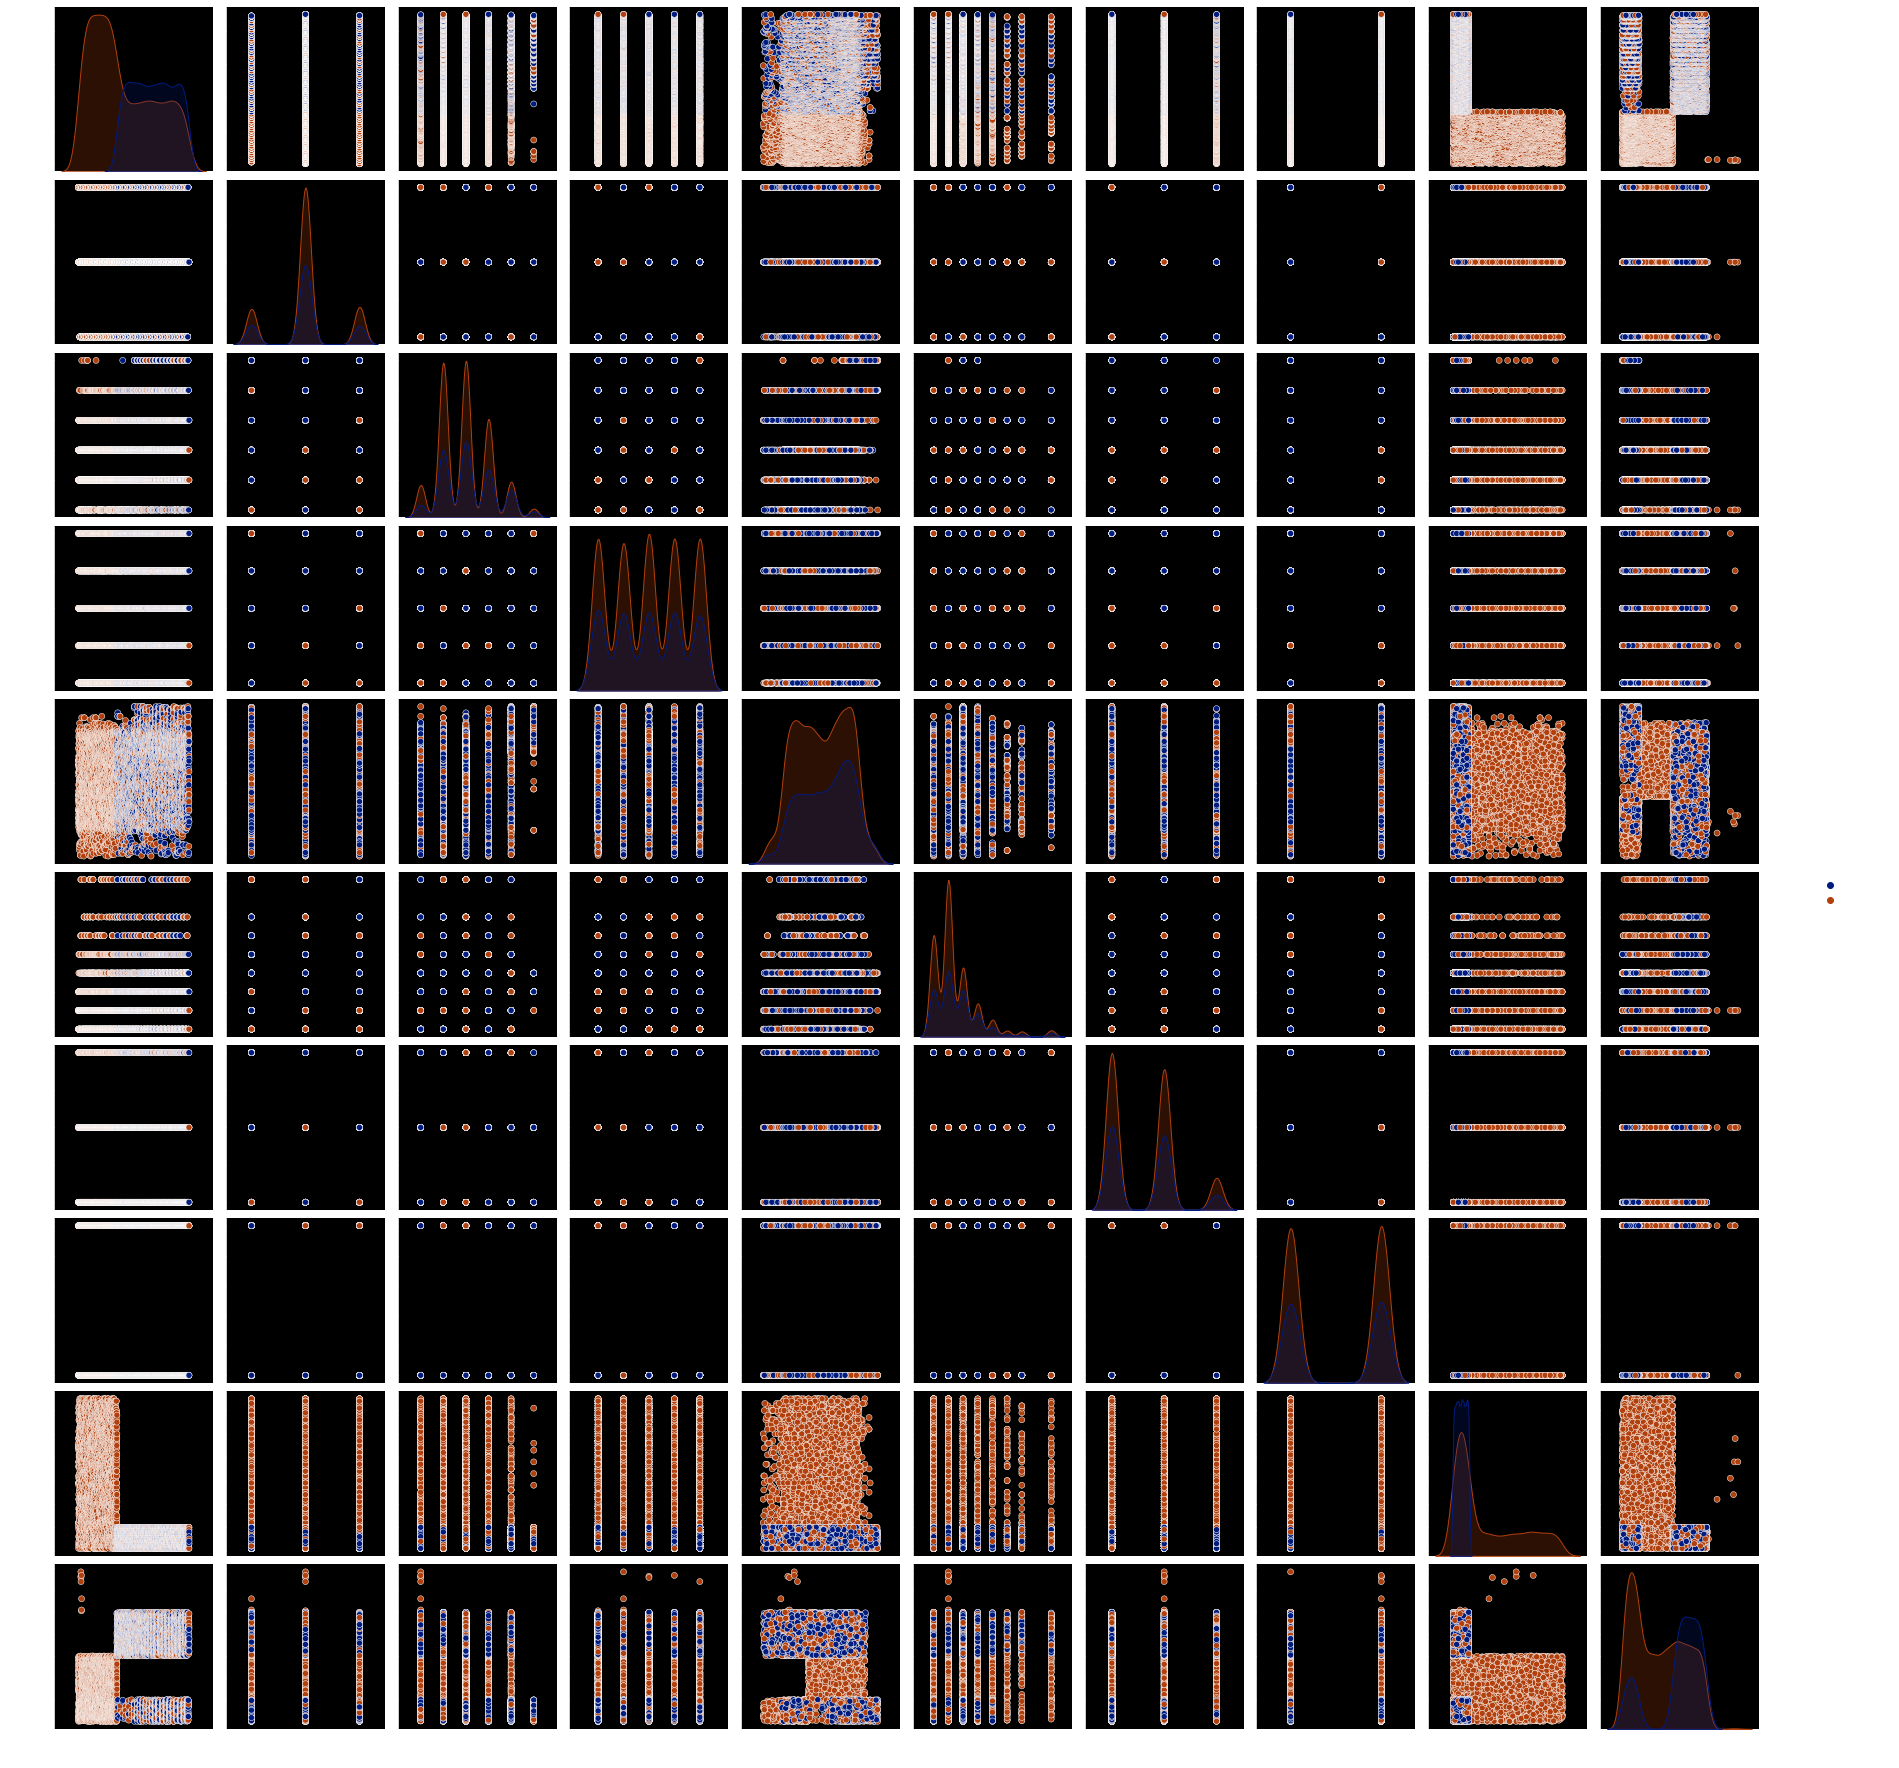

In [7]:
sns.pairplot(df_train, hue="Reached.on.Time_Y.N", palette='dark')


Atributos como el género del cliente o el descuento ofrecido no se tienen en cuenta porque se supone que no tienen una incidencia directa en el modo en el que el paquete viaja. 

Haciendo una inspección visual, se concluye que el atributo con mayor influencia para realizar la separación es el peso del paquete ('Weight_in_gms'). Al tratarse del primer intento en crear un modelo, no se realiza una estandarización. 



Se procede a realizar el modelo de Regresión Lineal. Este tipo de modelo tiene especial utilización en la clasificación binaria. 

Como atributo se considerará únicamente el peso del paquete.
Las etiquetas serán el hecho de si el mismo llegó o no a tiempo.

Utilizando el train_test_split de sklearn se divide el total del Dataframe en dos subsets, uno para entrenar el modelo y otra para ponerlo a prueba.


Veamos la distribución del peso de los paquetes:

c:\Users\ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

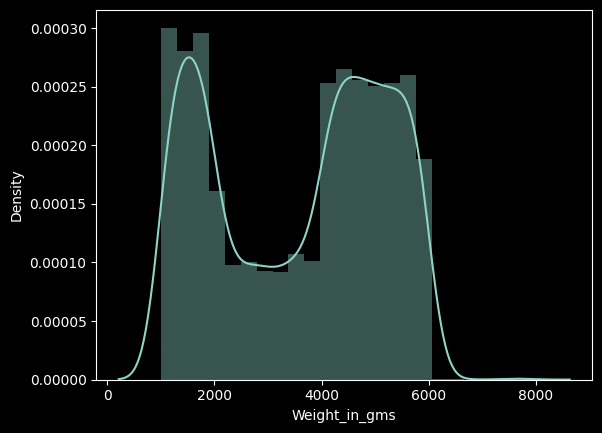

In [12]:

X = df_train['Weight_in_gms']

sns.distplot(X)
#plt.show()

Se procede a estandarizar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.fit_transform(X_Test)

In [18]:
from sklearn.model_selection import train_test_split

X = df_train['Weight_in_gms']

X = X.values.reshape(-1,1)

y = df_train['Reached.on.Time_Y.N']


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=12 )

In [19]:
# Se importa el modelo de Regresión Logística:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [28]:
# Se entrena el modelo:

LR.fit(X_train,y_train)

LogisticRegression()

Se ordena al modelo a que prediga el subset destinado a probar el 

In [29]:

y_train_pred = LR.predict(X_train)

y_test_pred = LR.predict(X_test)



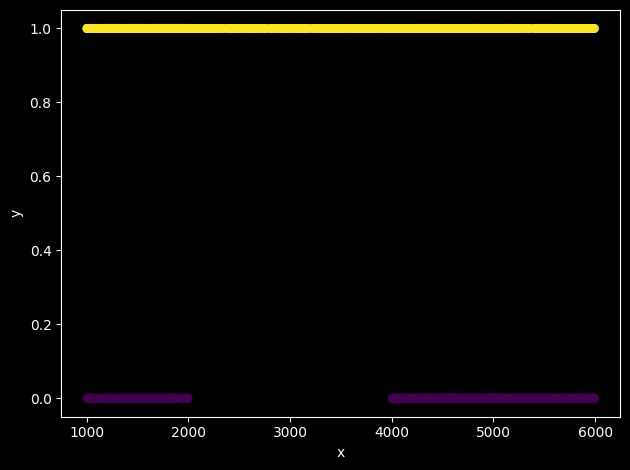

In [46]:
# Graficamos la curva obtenida por la regresión logística


from turtle import color


plt.scatter(X_test, y_test, c= y_test, alpha = 0.5, lw = 0.5)
#plt.scatter(X_test, y_test_pred,c=y_test_pred, alpha = 0.5, lw = 0.5)


plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

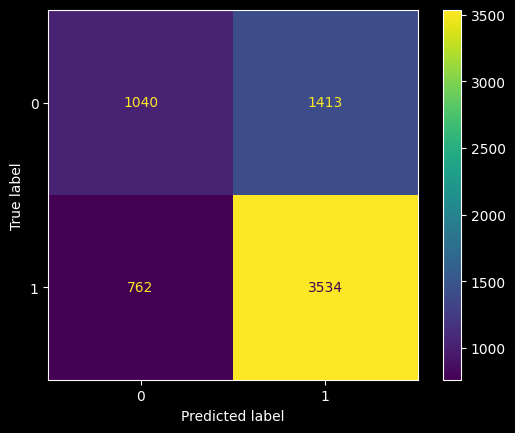

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


matrix = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()



In [51]:
# Accuracy:

from sklearn.metrics import accuracy_score

recall = accuracy_score(y_test, y_test_pred)
print(recall)


# Precision:

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred)
print (precision)



0.66
0.7001216545012166


In [92]:
# Por último se predice el archivo provisto para predecir:

df_test = pd.read_csv('E-Commerce_test.csv', sep=';')

df_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


Al igual que con el dataset anterior, nos quedamos únicamente con el atributo del peso de los paquetes.

In [93]:
df_test = df_test['Weight_in_gms']
df_test

0       5248
1       4446
2       5739
3       4643
4       5504
        ... 
1995    1538
1996    1247
1997    1155
1998    1210
1999    1639
Name: Weight_in_gms, Length: 2000, dtype: int64

Se procede a predecir si los envíos llegaran o no a tiempo en este último dataset de testeo. Para realizar esto, antes debe reconfigurarse la forma del dataset. 

In [96]:
df_test = df_test.values.reshape(-1,1)

df_test_pred = LR.predict(df_test)

df_test_pred

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Por último, y una vez obtenida la predicción, se vuelve a transponer el dataframe y se procede a exportarlo en un archivo CSV.

In [100]:

df_out = df_test_pred.reshape(-1,1)

df_out = pd.DataFrame(df_out, columns=['pred'])

df_out



,pred
0,0
1,1
2,0
3,1
4,0
...,...
1995,1
1996,1
1997,1
1998,1


In [102]:
# Se exporta el dataframe a un archivo csv:

df_out.to_csv('arseraf.csv', sep = ';', index=False)